The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, we'll try to answer several questions:

Q1. Which gender has got the most prizes?<br>
Q2. In which decade the ratio of US-born winners to the total winners was highest?<br>
Q3. Which decade and category combo saw the highest number of female winners<br>
Q4. Who was the first female Nobel Prize winner and in what category?<br>
Q5. List the name of individuals or organization who won the Nobel Prize more than once.

In [26]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!
nobel = pd.read_csv('data/nobel.csv', parse_dates=['birth_date', 'death_date'])
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'],errors='coerce')

In [27]:
#Print first few rows of the dataframe
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


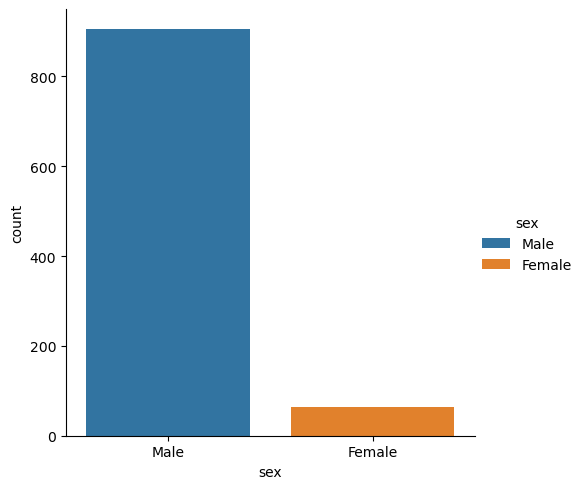

In [28]:
#using countplot to visualize the data
sns.catplot(data=nobel, kind='count', x='sex', hue='sex')
plt.show()
top_gender ='Male'

In [29]:
print(nobel['birth_country'].value_counts())
top_country = "United States of America"

birth_country
United States of America                        291
United Kingdom                                   91
Germany                                          67
France                                           58
Sweden                                           30
                                               ... 
Austria-Hungary (Ukraine)                         1
Ottoman Empire (Turkey)                           1
Russian Empire (Azerbaijan)                       1
Bosnia (Bosnia and Herzegovina)                   1
French protectorate of Tunisia (now Tunisia)      1
Name: count, Length: 129, dtype: int64


In [30]:
#Create a new column which suggests whether the individual or organization is from USA or not
nobel['us_born_winners'] = nobel['birth_country']=="United States of America"

#Create another column decade
nobel['decade'] = (nobel['year']//10)*10

#Typecast the column from object to integer
nobel['decade'] = nobel['decade'].astype(int)

#as_index so that it saves as dataframe rather than series
us_winners_ratio = nobel.groupby('decade',as_index=False)['us_born_winners'].mean()
print(us_winners_ratio.sort_values('us_born_winners',ascending=False))



    decade  us_born_winners
10    2000         0.422764
9     1990         0.403846
12    2020         0.360000
8     1980         0.319588
7     1970         0.317308
11    2010         0.314050
4     1940         0.302326
5     1950         0.291667
6     1960         0.265823
3     1930         0.250000
1     1910         0.075000
2     1920         0.074074
0     1900         0.017544


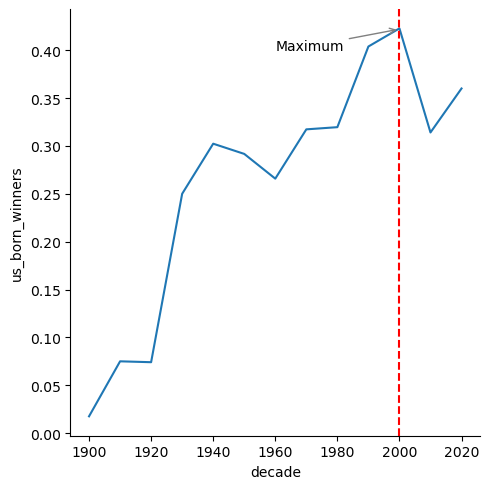

In [42]:
#We can visualize the values by creating a line plot
sns.relplot(kind='line',x='decade', y='us_born_winners',data=us_winners_ratio)
plt.annotate('Maximum', xy=(2000,0.422), xytext=(1960,0.40), arrowprops={'arrowstyle':'->', 'color':'gray'})
plt.axvline(x=2000, color='r', linestyle='--')
max_decade_usa = 2000

In [39]:
nobel['female'] = nobel['sex']=="Female"

#Grouping by decade and cateogry column 
dec_cat_combo = nobel.groupby(['decade','category'],as_index=False)['female'].mean()

print(dec_cat_combo)

    decade    category    female
0     1900   Chemistry  0.000000
1     1900  Literature  0.100000
2     1900    Medicine  0.000000
3     1900       Peace  0.071429
4     1900     Physics  0.076923
..     ...         ...       ...
67    2020   Economics  0.111111
68    2020  Literature  0.500000
69    2020    Medicine  0.125000
70    2020       Peace  0.285714
71    2020     Physics  0.166667

[72 rows x 3 columns]


In [38]:

max_female_row = dec_cat_combo.loc[dec_cat_combo['female']==dec_cat_combo['female'].max()]
max_female_dict ={max_female_row['decade'].values[0]: max_female_row['category'].values[0]}

print(max_female_dict)

{2020: 'Literature'}


In [36]:
female_winners= nobel.loc[nobel['sex']=="Female",['full_name','category']]
first_woman_name = female_winners['full_name'].values[0]
first_woman_category= female_winners['category'].values[0]

print(first_woman_name)


Marie Curie, née Sklodowska


In [37]:
more_than_one = nobel['full_name'].value_counts()
repeat_series = more_than_one[more_than_one >= 2].index
repeat_list = list(repeat_series)

print(repeat_list)

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
